In [1]:
#importing the required libraries
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import numpy as np
from numpy import genfromtxt
import pandas as pd
from pandas import Series
from datetime import datetime, timedelta
#reading data from csv file 
headers = ['Date','Open','High','Low','Close','Volume']
data = pd.read_csv('stock_data.csv',sep=',',names=headers)
data.head()

,Date,Open,High,Low,Close,Volume
0,1/1/2017,1443.38,1476.82,1443.80,1465.72,561280000.0
1,1/2/2017,1465.72,1484.89,1465.72,1482.85,494264992.0
2,1/3/2017,1482.85,1484.26,1456.69,1456.82,385836992.0
3,1/4/2017,1456.82,1462.83,1442.51,1457.82,320670016.0
4,1/5/2017,1457.82,1465.72,1451.36,1454.14,326768000.0


In [2]:
#loading the data into respective array
data['date'] = pd.to_datetime(data['Date'])
close=data['Close']
time=data['date']

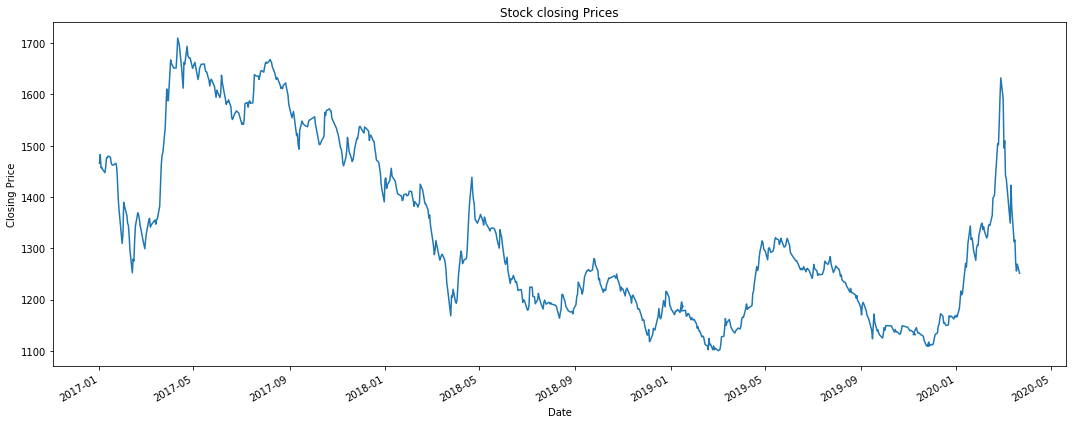

In [40]:
#plotting the data
plt.rcParams['figure.figsize']=(15,6)
plt.plot(time, close, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Stock closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.tight_layout()
plt.show()

In [4]:
#Determining rolling Statistics
rolmean= close.rolling(window=30).mean()
rolstd= close.rolling(window=30).std()
print(rolmean,rolstd)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
767    1413.971333
768    1411.485333
769    1408.374333
770    1406.116333
771    1403.086000
Name: Close, Length: 772, dtype: float64 0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
767     92.654802
768     95.481064
769     99.037046
770    101.462051
771    104.736648
Name: Close, Length: 772, dtype: float64


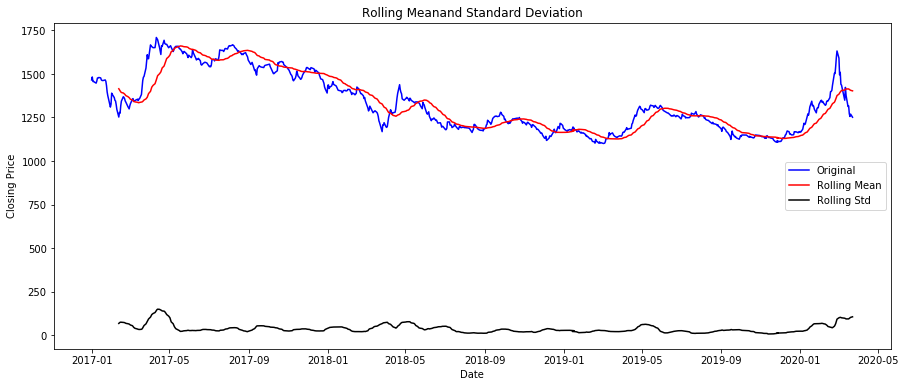

In [5]:
#plotting rolling statistics
orig=plt.plot(time,close,color="blue",label="Original")
mean=plt.plot(time,rolmean,color="red",label="Rolling Mean")
std=plt.plot(time,rolstd,color="black",label="Rolling Std")
plt.legend(loc='best')
plt.title("Rolling Meanand Standard Deviation")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show(block=False)

In [6]:
#perform dicky fulller test
from statsmodels.tsa.stattools import adfuller
print("Results of Dicky-Fuller Test")
dftest=adfuller(close,autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Tset Statistics','p-value','# Lags Used','Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)       


Results of Dicky-Fuller Test
Tset Statistics                -1.867538
p-value                         0.347483
# Lags Used                     4.000000
Number of Observation Used    767.000000
Critical Value (1%)            -3.438905
Critical Value (5%)            -2.865316
Critical Value (10%)           -2.568781
dtype: float64


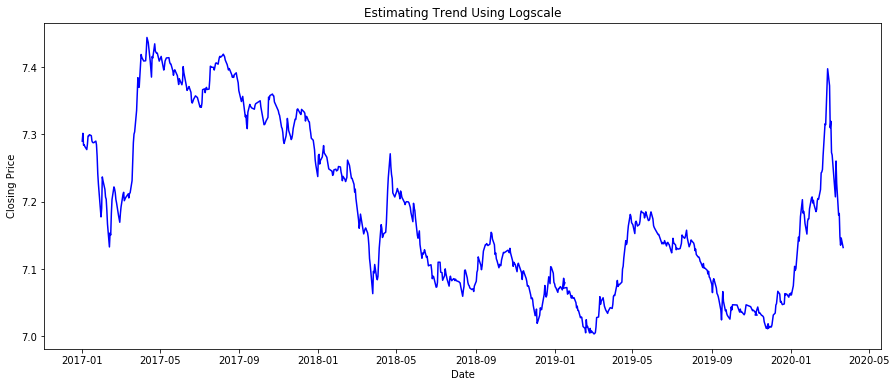

In [24]:
#Estimating Trend 
close_logScale=np.log(close)
plt.plot(time,close_logScale,color='blue')
plt.title("Estimating Trend Using Logscale")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show(block=False)

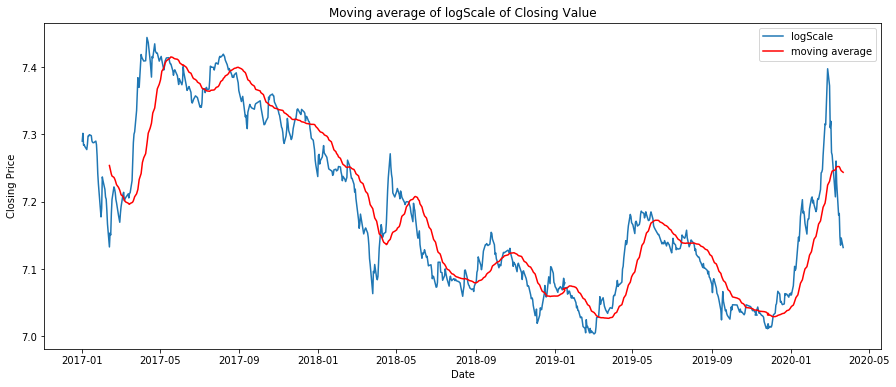

In [25]:
#moving average of logScale of closing vallue
movingAverage=close_logScale.rolling(window=30).mean()
movingSTD=close_logScale.rolling(window=30).std()
plt.title("Moving average of logScale of Closing Value")
plt.plot(time,close_logScale,label="logScale")
plt.plot(time,movingAverage,color="red",label="moving average")
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show(block=False)


In [26]:
#differencing of moving average from closing value logScale
close_logScaleMinusMovingAverage=close_logScale-movingAverage
indexed_data=close_logScaleMinusMovingAverage.to_frame()
indexed_data.set_index(time,inplace=True)
#removing nan data 
indexed_data.dropna(inplace=True)
indexed_data

,Close
date,
2017-02-12,-0.121014
2017-02-13,-0.095549
2017-02-14,-0.093655
2017-02-15,-0.058005
2017-02-16,-0.034957
...,...
2020-03-16,-0.069503
2020-03-17,-0.101859
2020-03-18,-0.112334


In [27]:
def test_stationarity(timeseries):
    
    #determining moving average
    movingAverage=timeseries.rolling(window=30).mean()
    movingSTD=timeseries.rolling(window=30).std()
    
    #plot rolling statistics
    plt.title("Rolling mean and Standard Deviation")
    plt.plot(timeseries,color="blue",label="Original")
    plt.plot(movingAverage,color="red",label="Rolling Mean")
    plt.plot(movingSTD,color="black",label="Rolling Std")
    plt.legend(loc="best")
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show(block=False)
    
    #perform Dicky-Fuller Test
    print("Results of Dicky-Fuller Test")
    dftest=adfuller(timeseries['Close'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Tset Statistics','p-value','# Lags Used','Number of Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)       

    
    


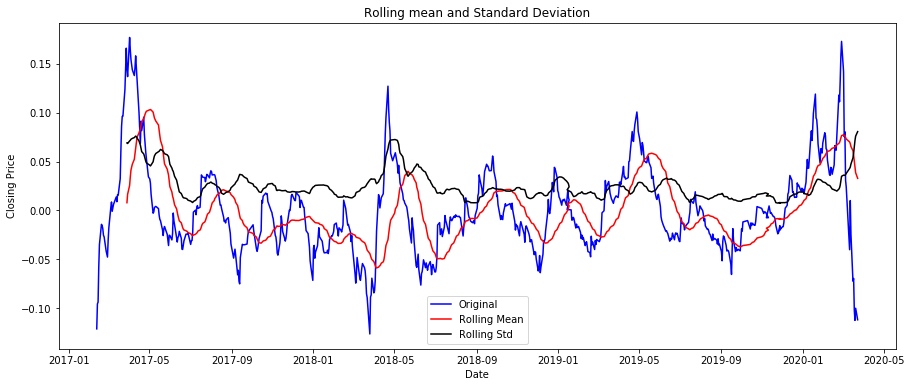

Results of Dicky-Fuller Test
Tset Statistics                -4.471434
p-value                         0.000221
# Lags Used                     4.000000
Number of Observation Used    738.000000
Critical Value (1%)            -3.439242
Critical Value (5%)            -2.865464
Critical Value (10%)           -2.568860
dtype: float64


In [28]:
test_stationarity(indexed_data)

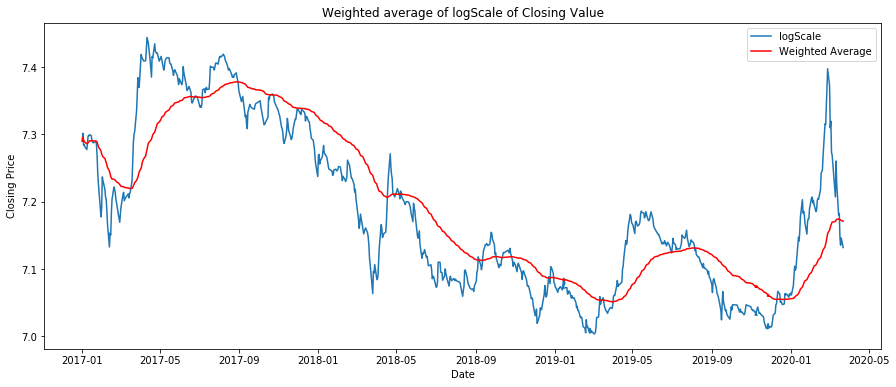

In [29]:
#calculating weighted average of time series
exponentialDecayWeightedAverage=close_logScale.ewm(halflife=30, min_periods=0, adjust=True).mean()
plt.plot(time,close_logScale,label='logScale')
plt.plot(time,exponentialDecayWeightedAverage,color='red',label="Weighted Average")
plt.title("Weighted average of logScale of Closing Value")
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show(block=False)

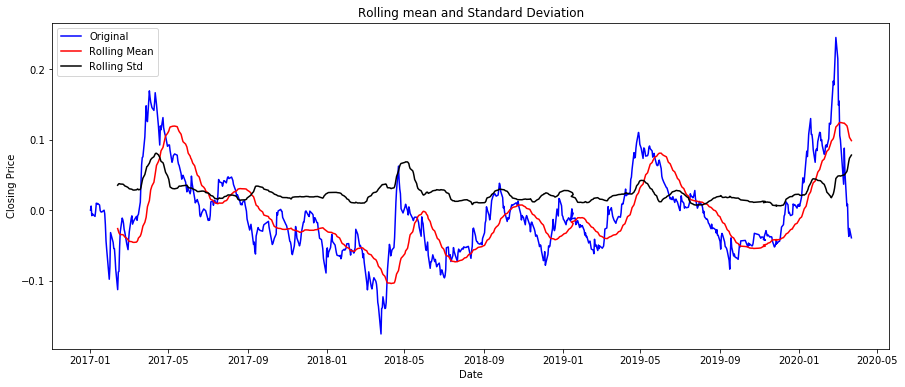

Results of Dicky-Fuller Test
Tset Statistics                -3.538760
p-value                         0.007046
# Lags Used                     4.000000
Number of Observation Used    767.000000
Critical Value (1%)            -3.438905
Critical Value (5%)            -2.865316
Critical Value (10%)           -2.568781
dtype: float64


In [32]:
#differencing weighted average from logScale closing value
close_logscaleMinusMovingDecayAverage=close_logScale-exponentialDecayWeightedAverage
close_logscaleMinusMovingDecayAverage=close_logscaleMinusMovingDecayAverage.to_frame()
close_logscaleMinusMovingDecayAverage.set_index(time,inplace=True)
test_stationarity(close_logscaleMinusMovingDecayAverage)

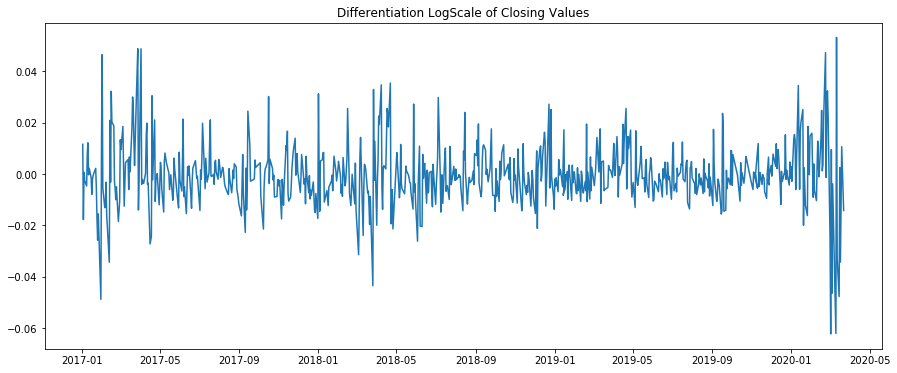

pandas.core.frame.DataFrame

In [50]:
#indexing logSclae close values
indexed_close_logScale=close_logScale.to_frame()
indexed_close_logScale.set_index(time,inplace=True)

#differentiating Logscale indexed close dataset
datasetLogDiffShifting=indexed_close_logScale-indexed_close_logScale.shift()
plt.title('Differentiation LogScale of Closing Values')
plt.plot(datasetLogDiffShifting)
plt.show()

type(indexed_close_logScale)



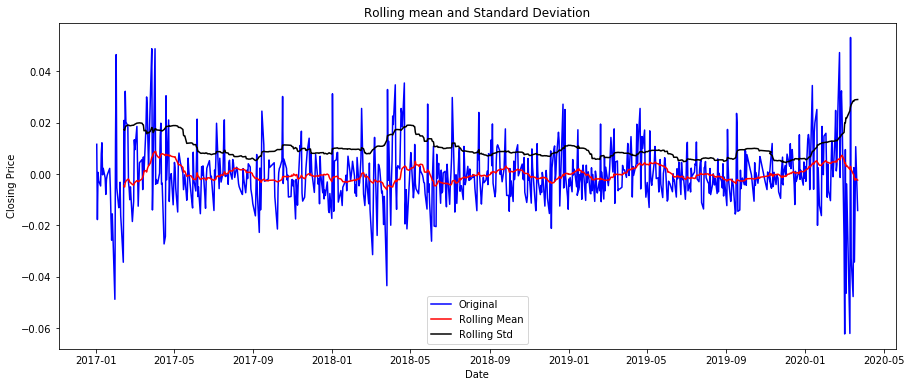

Results of Dicky-Fuller Test
Tset Statistics              -1.176875e+01
p-value                       1.102798e-21
# Lags Used                   3.000000e+00
Number of Observation Used    7.670000e+02
Critical Value (1%)          -3.438905e+00
Critical Value (5%)          -2.865316e+00
Critical Value (10%)         -2.568781e+00
dtype: float64


In [47]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

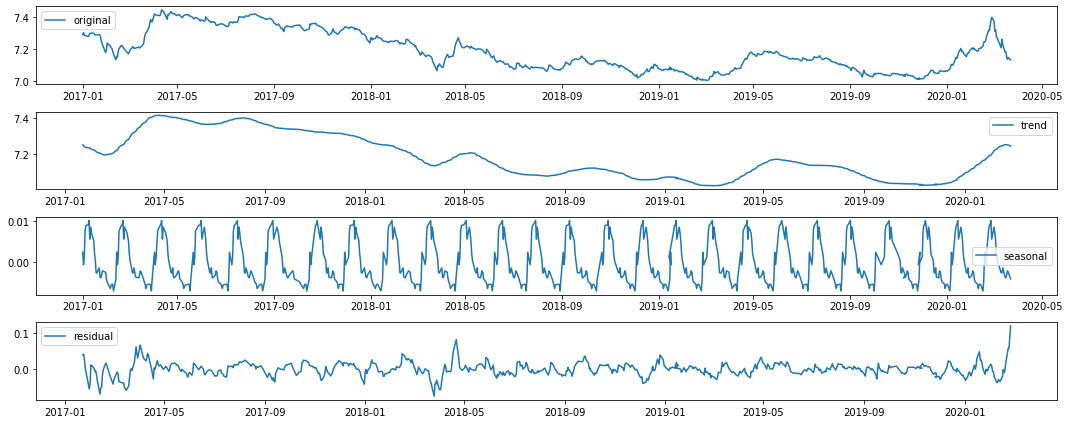

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexed_close_logScale, freq=30)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexed_close_logScale, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()

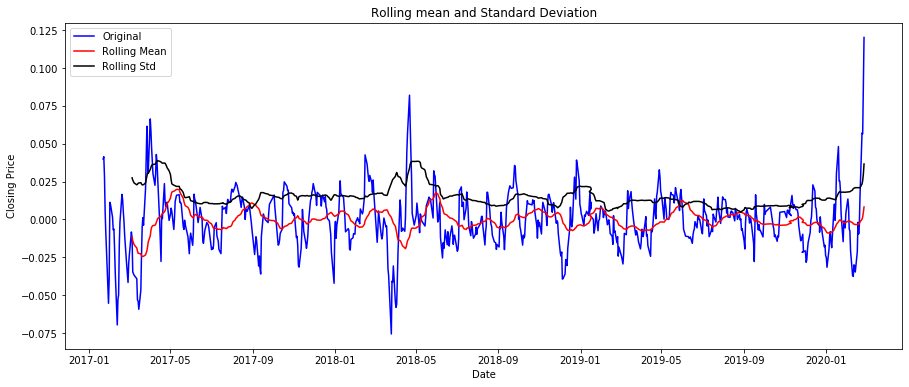

Results of Dicky-Fuller Test
Tset Statistics              -7.572343e+00
p-value                       2.819599e-11
# Lags Used                   8.000000e+00
Number of Observation Used    7.330000e+02
Critical Value (1%)          -3.439303e+00
Critical Value (5%)          -2.865491e+00
Critical Value (10%)         -2.568874e+00
dtype: float64


In [53]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

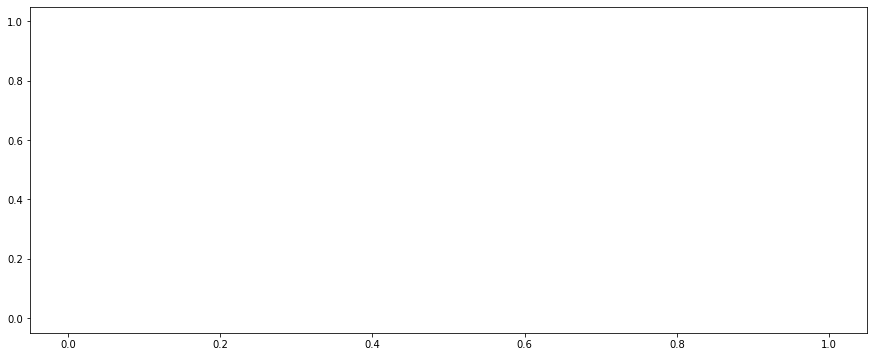

In [59]:
#calculating acf and pacf
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(datasetLogDiffShifting,nlags=20)
lag_pacf=acf(datasetLogDiffShifting,nlags=20)
plt.plot(lag_acf)